In [21]:
import pandas as pd

In [22]:
solar_capability = pd.read_csv("installed-solar-pv-capacity.csv")

solar_capability = solar_capability.rename(columns={'Solar energy capacity - GW': 'capability_gw'})
solar_capability = solar_capability.loc[solar_capability['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
solar_capability

,Entity,Code,Year,capability_gw
262,Australia,AUS,2000,0.025000
263,Australia,AUS,2001,0.029000
264,Australia,AUS,2002,0.034000
265,Australia,AUS,2003,0.039400
266,Australia,AUS,2004,0.046400
...,...,...,...,...
4197,Vietnam,VNM,2018,0.104992
4198,Vietnam,VNM,2019,4.993491
4199,Vietnam,VNM,2020,16.660492
4200,Vietnam,VNM,2021,16.660492


# CO2 COMMISSION

In [23]:
co2_per_cap = pd.read_csv("CSV/co-emissions-per-capita.csv")

# co2_per_cap = co2_per_cap.rename(columns={'Annual CO₂ emissions (per capita)': 'capita'})
co2_per_cap = co2_per_cap.loc[co2_per_cap['Entity'].isin(["Vietnam", "Australia", "Japan", "Singapore"])] ## FILTER
co2_per_cap = co2_per_cap.loc[(co2_per_cap['Year'] >= 2000)]
co2_per_cap

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1942,Australia,AUS,2000,18.404053
1943,Australia,AUS,2001,18.587940
1944,Australia,AUS,2002,18.614680
1945,Australia,AUS,2003,18.754335
1946,Australia,AUS,2004,19.215673
...,...,...,...,...
26068,Vietnam,VNM,2018,2.715315
26069,Vietnam,VNM,2019,3.568600
26070,Vietnam,VNM,2020,3.759417
26071,Vietnam,VNM,2021,3.617115


In [46]:
pip install plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


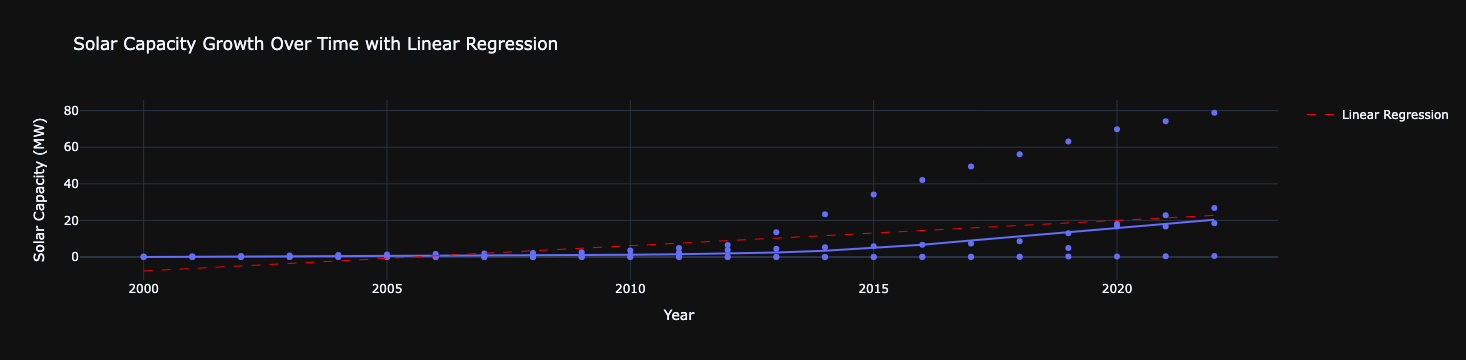

Linear Regression Equation: Y = 1.3819980507891794 * X + -2771.6199364339514
Predicted Solar Capacity in 2030: 25.54411836334748 MW


In [31]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression

solar_capability_column_year          = solar_capability['Year'].to_numpy()
solar_capability_column_capability_gw = solar_capability['capability_gw'].to_numpy()

# Example data (Year vs. Solar Capacity in MW)
years = np.array(solar_capability_column_year).reshape(-1, 1)
solar_capacity = np.array(solar_capability_column_capability_gw)  # Solar capacity in MW

# Create a DataFrame for Plotly Express
df = pd.DataFrame({
    'Year': years.flatten(),
    'Solar Capacity (MW)': solar_capacity
})

# Fit the Linear Regression model
model = LinearRegression()
model.fit(years, solar_capacity)

# Predict values
df['Predicted Solar Capacity (MW)'] = model.predict(years)

# Create a scatter plot with linear regression line
fig = px.scatter( 
                 df, 
                 x='Year', 
                 y='Solar Capacity (MW)', 
                 title='Solar Capacity Growth Over Time with Linear Regression',
                 labels={'Solar Capacity (MW)': 'Solar Capacity (MW)', 'Year': 'Year'},
                 trendline="lowess",
                 template='plotly_dark')

# Add the linear regression line to the figure
fig.add_scatter(x=df['Year'], 
                 y=df['Predicted Solar Capacity (MW)'], 
                 mode='lines', 
                 name='Linear Regression', 
                 line=dict(color='red', width=1, dash='dash')
               )

# Show plot
fig.show()

# Print the regression coefficients
slope = model.coef_[0]  # This is the slope
intercept = model.intercept_
print(f'Linear Regression Equation: Y = {slope} * X + {intercept}')

# Predict solar capacity for the year 2030
future_year = np.array([[2024]])
predicted_capacity = model.predict(future_year)
print(f'Predicted Solar Capacity in 2030: {predicted_capacity[0]} MW')


In [32]:
import plotly.graph_objects as go

df_2023 = df['Predicted Solar Capacity (MW)'].values[-1]
df_2023


22.78012226176952

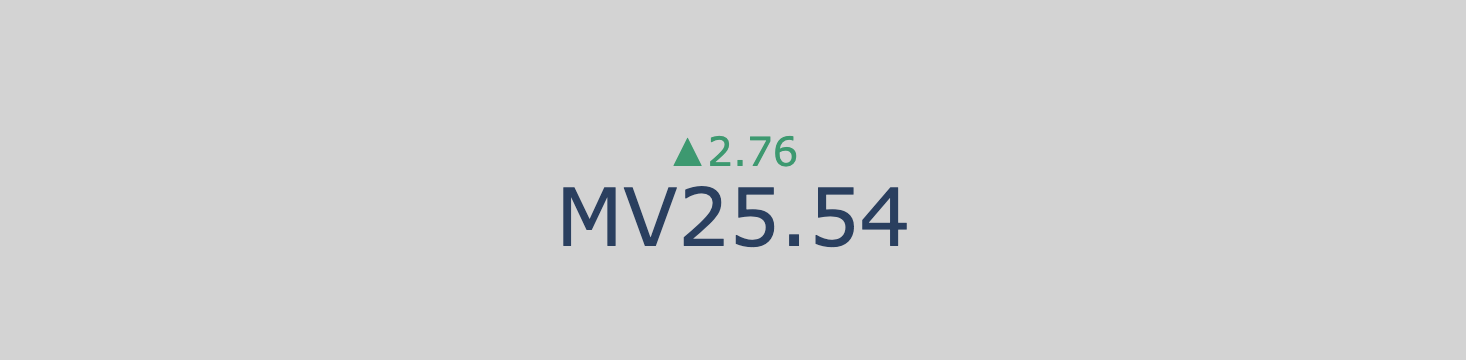

In [28]:
fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = predicted_capacity[0],
    number = {'prefix': "MV"},
    delta = {'position': "top", 'reference': df_2023},
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

In [7]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output

# Create dataframes
policy_data = {
    'Policy_ID': ['P001', 'P002', 'P003', 'P004'],
    'Policy_Name': ['Solar Initiative', 'Green Energy Act', 'Sun Future', 'Solar Grants'],
    'Country': ['Australia', 'Japan', 'Vietnam', 'Singapore'],
    'Year_Implemented': [2020, 2019, 2021, 2018],
    'Policy_Type': ['Subsidy', 'Regulation', 'Tax Credit', 'Grant Program'],
    'Target_Area': ['Solar PV Deployment', 'Solar Grid Integration', 'R&D in Solar Tech', 'Commercial Solar Farms'],
    'Funding_Amount': [500_000_000, 750_000_000, 300_000_000, 1_000_000_000],
    'Adoption_Rate (%)': [85, 65, 50, 90],
    'Stakeholder_Influence (%)': [70, 60, 50, 80],
    'Sentiment_Score': [0.65, 0.70, 0.55, 0.75],
    'Policy_Impact_Score': [80, 75, 60, 85]
}
df_policy = pd.DataFrame(policy_data)

sentiment_data = {
    'Sentiment_ID': ['S001', 'S002', 'S003', 'S004'],
    'Policy_ID': ['P001', 'P001', 'P002', 'P003'],
    'Date': ['2020-01-01', '2021-05-15', '2019-09-12', '2021-03-10'],
    'Sentiment_Type': ['Positive', 'Neutral', 'Negative', 'Positive'],
    'Sentiment_Score': [0.75, 0.5, -0.3, 0.8]
}
df_sentiment = pd.DataFrame(sentiment_data)

# Aggregate sentiment data by policy (average sentiment score)
sentiment_agg = df_sentiment.groupby('Policy_ID').agg(
    Avg_Sentiment_Score=('Sentiment_Score', 'mean')).reset_index()

# Merge sentiment data with policy data
df_policy_sentiment = pd.merge(df_policy, sentiment_agg, on='Policy_ID', how='left')

# Calculate correlation between average sentiment score and policy impact score
correlation_value = df_policy_sentiment['Avg_Sentiment_Score'].corr(df_policy_sentiment['Policy_Impact_Score'])

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create visualizations
# Scatter plot for sentiment vs policy impact
sentiment_vs_impact_fig = px.scatter(df_policy_sentiment, 
                                     x='Avg_Sentiment_Score', 
                                     y='Policy_Impact_Score',
                                     color='Country', 
                                     size='Funding_Amount',
                                     hover_data=['Policy_Name', 'Policy_Type'],
                                     title='Sentiment vs Policy Impact Score')

# Heatmap for correlation matrix (optional, if multiple variables are involved)
corr_matrix = df_policy_sentiment[['Avg_Sentiment_Score', 'Policy_Impact_Score', 'Adoption_Rate (%)']].corr()
heatmap_fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'))

heatmap_fig.update_layout(title='Correlation Heatmap')

# Define the app layout
app.layout = dbc.Container([
    dbc.Row(html.H1("Solar Energy Policy Impact Dashboard")),
    
    dbc.Row([
        dbc.Col(dcc.Graph(figure=sentiment_vs_impact_fig), width=6),
        dbc.Col(dcc.Graph(figure=heatmap_fig), width=6),
    ]),
    
    dbc.Row(html.H4(f"Correlation between Sentiment Score and Policy Impact Score: {correlation_value:.2f}")),
    
    dbc.Row(html.P("This dashboard shows the correlation between public sentiment and policy impact for solar energy policies. Higher sentiment scores can indicate stronger support or opposition, which may affect policy outcomes.")),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


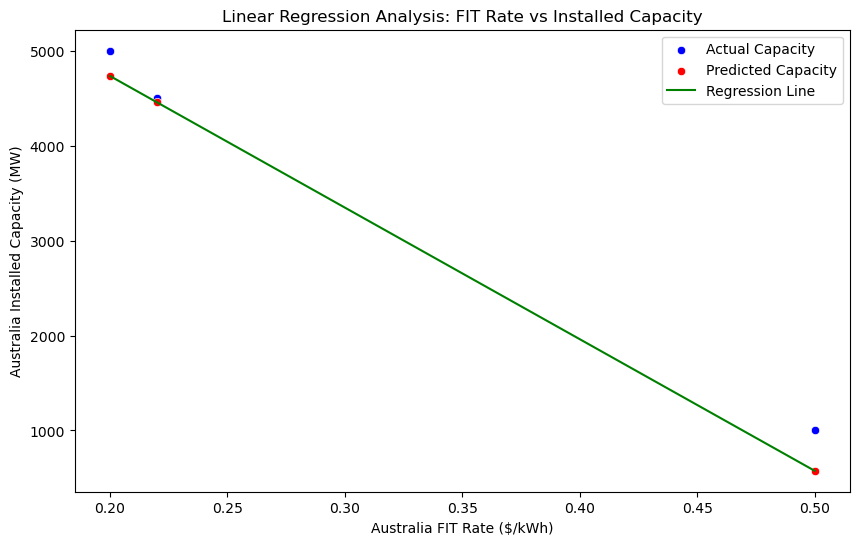

Coefficient: -13859.443631039529, Intercept: 7505.3879941434825


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Australia_FIT': [0.50, 0.48, 0.45, 0.40, 0.38, 0.35, 0.30, 0.28, 0.25, 0.22, 0.20, 0.18],
    'Australia_Capacity': [1000, 1200, 1500, 1800, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare the data for linear regression
X = df[['Australia_FIT']]  # Independent variable
y = df['Australia_Capacity']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Australia_FIT'], y=y_test, color='blue', label='Actual Capacity')
sns.scatterplot(x=X_test['Australia_FIT'], y=y_pred, color='red', label='Predicted Capacity')
plt.plot(X_test, y_pred, color='green', label='Regression Line')
plt.xlabel('Australia FIT Rate ($/kWh)')
plt.ylabel('Australia Installed Capacity (MW)')
plt.title('Linear Regression Analysis: FIT Rate vs Installed Capacity')
plt.legend()
plt.show()

# Coefficients
print(f'Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}')


In [30]:
# import dash
# import dash_bootstrap_components as dbc ## USE BOOSTRAP COMPONENTS

import plotly.express as px
# import plotly.graph_objs as go

import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output



app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP]) ## ENABLE DASH APPLIATION TO BOOSTRAP 



# Load the sample Gapminder dataset and filter it for Oceania
# df = px.data.gapminder().query("continent == 'Oceania'")

# Create a line chart using Plotly Express
fig = px.line(solar_capability, x='Year', y='capability_gw', color='Code', markers=True,
              title="Capability of generating electrity by country in GW")

fig2 = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker_size=[40, 60, 80, 100])
])

fig3 = px.scatter(environment_concern, x="Percentage", y="Percentage",
	         size="Percentage", color="Country",
                 hover_name="Statement", log_x=True, size_max=60)

fig_eka = px.line(erka_data, x='Year', y='Percentage', color='Country', symbol="Country")
# fig.show()

fig_eka = px.line(erka_data, x='Year', y='Percentage', color='Country', markers=True,
              title="TITLE")

app.layout = dbc.Container(
    [
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='line-chart',
                    figure=fig
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
      dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='bubble',
                    figure=fig3
                ),
                style = { 
                    "border" : "solid #808080 1px", 
                    "outline": "none",
                    "margin": "7px 7px 7px 7px"
                }
            )
        ),
dbc.Row(
    dbc.Col(	
            dcc.Graph( 
                id ="example1",  ## ID HAS NOT BE DIFFENT WITH OTHER COMPONET (CAN NOT DUPLICATED)
                figure ={ 
                    'data':[ 
                        {'x': solar_consumtion.Code,
                         'y': solar_consumtion.from_solar_twh, 
                         'type':'bar', 
                         'name':'Consumtion',
                         'marker_color' : "red"}, 
                        {'x': solar_capability.Code,
                         'y':solar_capability.capability_gw, 
                         'type':'bar', 
                         'name':'Capacity'} 
                    ], 
                    'layout':{ 
                            'title': "Solar Consumption and Capacity"
                    },
                } 
            ),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
    )
),

dbc.Row(
		[
		dbc.Col(	
			dcc.Graph( 
				id ="example2", 
					figure ={ 
						'data':[ 
							{'x': solar_consumtion.Code,
							'y': solar_consumtion.from_solar_twh, 
								'type':'bar', 
								'name':'Consumtion',
							'marker_color' : "red"}, 
							{'x': solar_capability.Code,
							'y':solar_capability.capability_gw, 
								'type':'bar', 
								'name':'Capacity'} 
						], 
						'layout':{ 
						'title': "Solar Consumption and Capacity"
						} 
					} 
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		dbc.Col(	
			dcc.Graph( 
				id ="example3", 
					figure = fig_eka
			),
            style = { 
                "border" : "solid #808080 1px", 
                "outline": "none",
                "margin": "7px 7px 7px 7px"
            }
		),
		
		# dbc.Col(html.Div("One of three columns")),
		]
)
    ]
)

if __name__ == "__main__":
    app.run_server()

NameError: name 'environment_concern' is not defined